In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import umap
import scipy

/scratch/gpfs/rraghu/.conda/envs/cos513/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
mus = np.load("s2-11_allfeats_w512/s2-11_mu.npy")
labels = np.load("s2-11_allfeats_w512/s2-11_label.npy").astype(int)

In [7]:
labels = scipy.stats.mode(labels, axis=1).mode
mask = ((labels <= 4) & (labels > 0))
mus = mus[mask, :]

In [8]:
reducer = umap.UMAP()
mus_umap = reducer.fit_transform(mus)

/scratch/gpfs/rraghu/.conda/envs/cos513/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


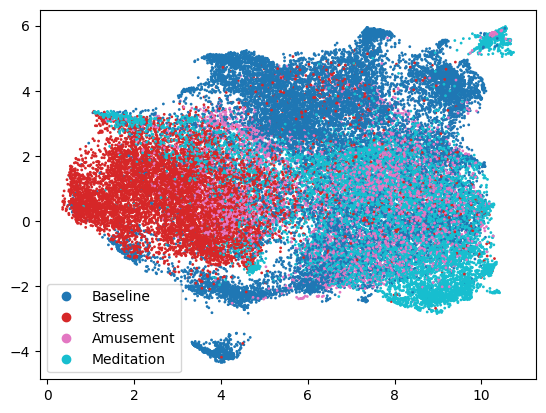

In [9]:
label_names = ["Transient", "Baseline", "Stress", "Amusement", "Meditation", "Ignore", "Ignore", "Ignore"]
label_names = [label_names[i] for i in [1,2,3,4]]
scatter = plt.scatter(mus_umap[:, 0], mus_umap[:, 1], c=labels[mask], s=1, alpha=1, cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=label_names)

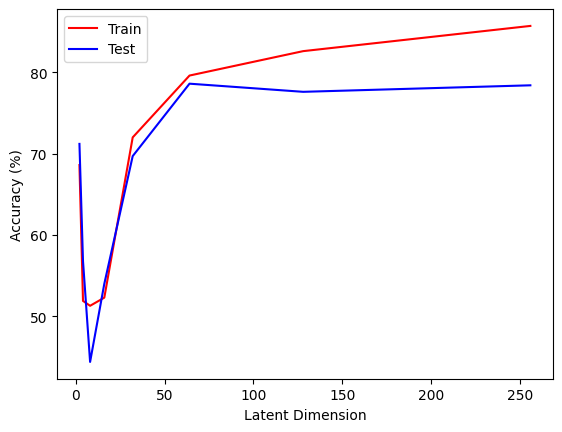

In [6]:
zs = [2, 4, 8, 16, 32, 64, 128, 256]
train_accs = [68.6, 51.9, 51.3, 52.3, 72.0, 79.6, 82.6, 85.7]
test_accs = [71.2, 56.8, 44.4, 54.0, 69.7, 78.6, 77.6, 78.4]
train_accs_b = [58.9, 41.9, 40.4, 42.6, 63.5, 70.6, 74.4, 78.8]
test_accs_b = [59.6, 46.5, 34.2, 44.2, 59.7, 67.5, 66.8, 67.8]

plt.plot(zs, train_accs, label='Train', color="red")
plt.plot(zs, test_accs, label='Test', color="blue")
#plt.xticks(zs)
plt.xlabel('Latent Dimension')
plt.ylabel('Accuracy (%)')
plt.legend()